<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Hackathon - Good Fast Cheap
## Notebook 2 - Best Model
Group members:  Stephen Strawbridge, Michael Winder, Max Bossee, Aziz Maredia<br>Cohort #1019


---
## Imports & Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
#Read in data
df = pd.read_csv('./data/large_train_sample.csv')
df_clean = pd.read_csv('./data/large_train_sample.csv')

In [ ]:
df_clean.columns

In [ ]:
#check out data info (no nulls found)
df.info()

#Data integrity of datatypes is all good as well

In [5]:
#Dataframe is now clean and ready for feature engineering!

## Feature Engineering

In [6]:
#Feature engineer a 'net_capital' feature with the net sum of capital gain and capital loss
df['net_capital'] = df['capital-gain'] - df['capital-loss']

#Now drop capital-gain and capital-loss columns
df = df.drop(columns=['capital-gain', 'capital-loss'])

In [7]:
#Binarize sex into male and female
df['sex'] = df['sex'].map({' Male': 1, ' Female' : 0})

In [8]:
#Create target column
df['target'] = df['wage'].map({' >50K': 1, ' <=50K' : 0})
#Create target column
df_clean['target'] = df_clean['wage'].map({' >50K': 1, ' <=50K' : 0})

In [9]:
#Drop education column, because education number feature is essentially giving us the same information in numerical format
df = df.drop(columns='education')

In [10]:
#Dataframe is now ready for train-test-split
df.to_csv('cleaned_df.csv')

In [11]:
#Define X and y and do train-test-split
X = df.drop(columns=['wage'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [12]:
#Create function that maps the 'target' mean to each value in categorical columns
occ_num = list(X_train.groupby(by='occupation')['target'].mean())

occ_list = list(X_train['occupation'].sort_values().unique())
occ_list
occ_dict = dict(zip(occ_list, occ_num))

In [13]:
#Features to map
map_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'native-country']

In [14]:
map_dicts = {}
for feature in map_features:
    
    feat_num = list(X_train.groupby(by=feature)['target'].mean())
    feat_list = list(X_train[feature].sort_values().unique())
    feat_dict = dict(zip(feat_list, feat_num))
    #map_dicts.append(feat_dict)
    
    map_dicts[feature] = feat_dict
    
    X_train[feature]=  X_train[feature].map(feat_dict)
        


<ipython-input-14-018e3a0f82e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature]=  X_train[feature].map(feat_dict)


In [ ]:
#Check on status
X_train.head(5)

In [16]:
for feature in map_features:  
    X_test[feature]=  X_test[feature].map(map_dicts[feature])

<ipython-input-16-a48ad192c8b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature]=  X_test[feature].map(map_dicts[feature])


In [17]:
#It was noted that X_test had one null value - drop this row
X_test = X_test.dropna()

#In order to drop same row in y_test, reset the y_test variable with updated X_test
y_test = X_test['target']

In [18]:
# Lets make a dictionary to automate my modelling - Source code from Michael Winder
log = LogisticRegression()
knnc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
bagc = BaggingClassifier()
#rfc = RandomForestClassifier()
adac = AdaBoostClassifier(n_estimators=500)
#svc = SVC()

models = {
#     'log' : log,
#     'knn' : knnc,
#     'dt' : dtc,
#     'bag' : bagc,
 #   'rf' : rfc,
    'ada' : adac,
#    'svr' : svc
}

#Ensure X_train and y_train variables are appropiate
X_train = X_train.drop(columns=['target'])
X_test = X_test.drop(columns=['target'])

for est in models.values():
    print(est)
    est.fit(X_train, y_train)
    print(f'Training Score: {round(est.score(X_train, y_train), 4)}')
    print(f'Testing Score: {round(est.score(X_test, y_test), 4)}')
    print('')

AdaBoostClassifier(n_estimators=500)
Training Score: 0.8725
Testing Score: 0.8692




---
## Visualizations

In [19]:
df_clean['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [20]:
df_clean.groupby(by='marital-status')['target'].mean()

marital-status
 Divorced                 0.104209
 Married-AF-spouse        0.434783
 Married-civ-spouse       0.446848
 Married-spouse-absent    0.081340
 Never-married            0.045961
 Separated                0.064390
 Widowed                  0.085599
Name: target, dtype: float64

In [21]:
ms_plot = pd.DataFrame()
ms_plot['mean'] =  df_clean.groupby(by='marital-status')['target'].mean().sort_values()
ms_plot

,mean
marital-status,
Never-married,0.045961
Separated,0.064390
Married-spouse-absent,0.081340
Widowed,0.085599
Divorced,0.104209
Married-AF-spouse,0.434783
Married-civ-spouse,0.446848


<Figure size 864x576 with 0 Axes>

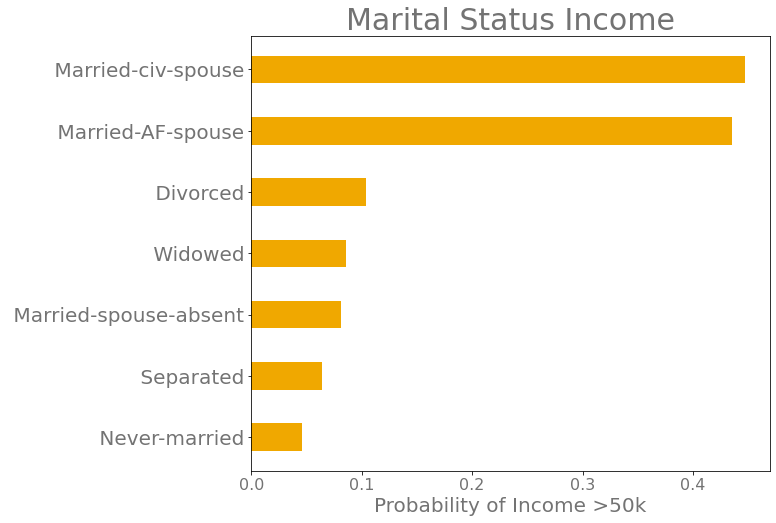

In [22]:
# Create a plot showing the frequency of words used by subreddit
# https://python-graph-gallery.com/11-grouped-barplot/
plt.figure(figsize=(12,8))

# set width of bar
barWidth = 0.45
 
# Set position of bar on X axis
rac = [x + barWidth*1.0 for x in range(len(ms_plot))]
 
# Make the plot
plt.figure(figsize=(12,8))
plt.barh(rac, ms_plot['mean'], color='#f0a800', height=barWidth)
 
# Add xticks on the middle of the group bars
plt.title('Marital Status Income', fontsize=30, color='#737373')
plt.xlabel('Probability of Income >50k', fontsize=20, color='#737373')
plt.yticks([r + barWidth for r in range(len(ms_plot))], ms_plot.index, fontsize=20, color='#737373')
plt.xticks(fontsize=16, color='#737373')

plt.gcf().subplots_adjust(left=0.30)

plt.savefig("./marital_status_income.png");

In [23]:
df_clean['target'].value_counts(normalize=True)

0    0.75919
1    0.24081
Name: target, dtype: float64

---
## Conclusions/Submissions with Adaboost

In [24]:
final = pd.read_csv('./data/test_data.csv')

#Feature engineer a 'net_capital' feature with the net sum of capital gain and capital loss
final['net_capital'] = final['capital-gain'] - final['capital-loss']

#Now drop capital-gain and capital-loss columns
final = final.drop(columns=['capital-gain', 'capital-loss'])

#Binarize sex into male and female
final['sex'] = final['sex'].map({' Male': 1, ' Female' : 0})

#Drop education column, because education number feature is essentially giving us the same information in numerical format
final = final.drop(columns='education')

for feature in map_features:  
    final[feature]=  final[feature].map(map_dicts[feature])

In [25]:
final.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,sex,hours-per-week,native-country,net_capital
0,25,0.221744,226802,7,0.046879,0.129032,0.013213,1,40,0.249078,0
1,38,0.221744,89814,9,0.452808,0.118404,0.453744,1,50,0.249078,0
2,28,0.295374,336951,12,0.452808,0.329567,0.453744,1,40,0.249078,0
3,44,0.221744,160323,10,0.452808,0.129032,0.453744,1,40,0.249078,7688
4,18,0.102249,103497,10,0.046879,0.101833,0.013213,0,30,0.249078,0


In [26]:
#Predict on model ONLY using AdaBoost model
pred = models['ada'].predict(final)

In [27]:
pred[:50]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
pred = models['ada'].predict(final)
submission = pd.DataFrame(pred)
submission.to_csv('2-group-submission.csv', index=False)